In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import scipy.stats as sstats
from sklearn.model_selection import train_test_split
from sklearn.cluster import Birch
from sklearn.metrics import confusion_matrix
from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)
from sklearn.naive_bayes import MultinomialNB
import tqdm

from KNN import KNN

In [2]:
def accuracy_plot(axs, accs):
    plt.figure()
    plt.plot(axs, accs)

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_batch_1 = unpickle('cifar10/data_batch_1')


db1_labels = np.array(data_batch_1[b'labels'])
db1_data = np.array(data_batch_1[b'data'])

trainx, testx, trainy, testy = train_test_split(db1_data, db1_labels, test_size=0.33)

# KPCA


 20%|████████████████▊                                                                   | 1/5 [00:43<02:55, 43.95s/it]

KNN accuracy: 28.000000000000004 % on linear kernel



 40%|█████████████████████████████████▏                                                 | 2/5 [06:43<06:55, 138.49s/it]

KNN accuracy: 26.0 % on poly kernel



 60%|█████████████████████████████████████████████████▊                                 | 3/5 [07:33<03:44, 112.20s/it]

KNN accuracy: 10.0 % on rbf kernel



 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [08:14<01:30, 90.59s/it]

KNN accuracy: 10.0 % on sigmoid kernel



100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [08:58<00:00, 107.61s/it]

KNN accuracy: 30.0 % on cosine kernel


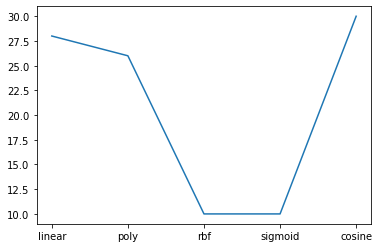

In [9]:
def kpca_kernels_comparison():
    kers = ['linear','poly','rbf', 'sigmoid', 'cosine']

    accs = []
    for ker in tqdm.tqdm(kers):
        kpca = decomposition.KernelPCA(n_components=None, kernel=ker, gamma=0.01)
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        
        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        accs.append(temp_acc)
        print(f"KNN accuracy: {temp_acc} % on {ker} kernel")

    accuracy_plot(kers, accs)
    
kpca_kernels_comparison()

In [10]:
def kpca_kernels_comparison():
    kers = ['linear','poly', 'cosine']
    gammas = [1, 0.1, 0.01, 0.0001]
    accs = []
    for ker in tqdm.tqdm(kers):
        for g in gammas:
            kpca = decomposition.KernelPCA(n_components=None, kernel=ker, gamma=g)
            x_proj = kpca.fit_transform(trainx)
            x_test_proj = kpca.transform(testx)
            knn = KNN(x_proj, trainy, x_test_proj, [7])


            temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
            accs.append(temp_acc)
            print(f"KNN accuracy: {temp_acc} % on {ker} kernel with {g} gamma")

#     accuracy_plot(kers, accs)
    
kpca_kernels_comparison()


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

KNN accuracy: 28.000000000000004 % on linear kernel with 1 gamma
KNN accuracy: 28.000000000000004 % on linear kernel with 0.1 gamma
KNN accuracy: 28.000000000000004 % on linear kernel with 0.01 gamma



 33%|███████████████████████████▋                                                       | 1/3 [02:55<05:50, 175.30s/it]

KNN accuracy: 28.000000000000004 % on linear kernel with 0.0001 gamma
KNN accuracy: 26.0 % on poly kernel with 1 gamma
KNN accuracy: 26.0 % on poly kernel with 0.1 gamma
KNN accuracy: 26.0 % on poly kernel with 0.01 gamma



 67%|███████████████████████████████████████████████████████▎                           | 2/3 [26:40<09:10, 550.20s/it]

KNN accuracy: 26.0 % on poly kernel with 0.0001 gamma
KNN accuracy: 30.0 % on cosine kernel with 1 gamma
KNN accuracy: 30.0 % on cosine kernel with 0.1 gamma
KNN accuracy: 30.0 % on cosine kernel with 0.01 gamma



100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [29:30<00:00, 590.04s/it]

KNN accuracy: 30.0 % on cosine kernel with 0.0001 gamma


# KPCA linear kernel analysis

In [14]:
def KPCA_linear():
    comps = np.arange(10,30,2)
    for i in tqdm.tqdm(comps):
        kpca = decomposition.KernelPCA(n_components=i, kernel='linear')
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        print(f"KNN accuracy: {temp_acc} % on linear kernel with {i} components")

KPCA_linear()


  5%|████▎                                                                              | 1/19 [00:05<01:37,  5.43s/it]

KNN accuracy: 13.0 % on linear kernel with 1 components



 11%|████████▋                                                                          | 2/19 [00:10<01:32,  5.47s/it]

KNN accuracy: 16.0 % on linear kernel with 2 components



 16%|█████████████                                                                      | 3/19 [00:17<01:32,  5.81s/it]

KNN accuracy: 20.0 % on linear kernel with 3 components



 21%|█████████████████▍                                                                 | 4/19 [00:23<01:28,  5.92s/it]

KNN accuracy: 21.0 % on linear kernel with 4 components



 26%|█████████████████████▊                                                             | 5/19 [00:29<01:24,  6.01s/it]

KNN accuracy: 25.0 % on linear kernel with 5 components



 32%|██████████████████████████▏                                                        | 6/19 [00:36<01:19,  6.13s/it]

KNN accuracy: 26.0 % on linear kernel with 6 components



 37%|██████████████████████████████▌                                                    | 7/19 [00:42<01:13,  6.11s/it]

KNN accuracy: 28.000000000000004 % on linear kernel with 7 components



 42%|██████████████████████████████████▉                                                | 8/19 [00:48<01:08,  6.20s/it]

KNN accuracy: 28.000000000000004 % on linear kernel with 8 components



 47%|███████████████████████████████████████▎                                           | 9/19 [00:55<01:03,  6.40s/it]

KNN accuracy: 30.0 % on linear kernel with 9 components



 53%|███████████████████████████████████████████▏                                      | 10/19 [01:26<02:02, 13.57s/it]

KNN accuracy: 31.0 % on linear kernel with 10 components



 58%|███████████████████████████████████████████████▍                                  | 11/19 [01:55<02:27, 18.43s/it]

KNN accuracy: 32.0 % on linear kernel with 11 components



 63%|███████████████████████████████████████████████████▊                              | 12/19 [02:26<02:34, 22.09s/it]

KNN accuracy: 32.0 % on linear kernel with 12 components



 68%|████████████████████████████████████████████████████████                          | 13/19 [02:53<02:21, 23.53s/it]

KNN accuracy: 33.0 % on linear kernel with 13 components



 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [03:22<02:06, 25.33s/it]

KNN accuracy: 32.0 % on linear kernel with 14 components



 79%|████████████████████████████████████████████████████████████████▋                 | 15/19 [03:54<01:48, 27.20s/it]

KNN accuracy: 32.0 % on linear kernel with 15 components



 84%|█████████████████████████████████████████████████████████████████████             | 16/19 [04:25<01:25, 28.50s/it]

KNN accuracy: 32.0 % on linear kernel with 16 components



 89%|█████████████████████████████████████████████████████████████████████████▎        | 17/19 [05:05<01:03, 31.72s/it]

KNN accuracy: 33.0 % on linear kernel with 17 components



 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [05:44<00:33, 34.00s/it]

KNN accuracy: 33.0 % on linear kernel with 18 components



100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [06:22<00:00, 20.15s/it]

KNN accuracy: 33.0 % on linear kernel with 19 components


In [15]:
def KPCA_linear():
    comps = np.arange(30,40,2)
    for i in tqdm.tqdm(comps):
        kpca = decomposition.KernelPCA(n_components=i, kernel='linear')
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        print(f"KNN accuracy: {temp_acc} % on linear kernel with {i} components")

KPCA_linear()


 20%|████████████████▊                                                                   | 1/5 [00:29<01:59, 29.87s/it]

KNN accuracy: 33.0 % on linear kernel with 30 components



 40%|█████████████████████████████████▌                                                  | 2/5 [00:59<01:29, 29.85s/it]

KNN accuracy: 34.0 % on linear kernel with 32 components



 60%|██████████████████████████████████████████████████▍                                 | 3/5 [01:29<00:59, 29.80s/it]

KNN accuracy: 33.0 % on linear kernel with 34 components



 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [02:01<00:30, 30.45s/it]

KNN accuracy: 33.0 % on linear kernel with 36 components



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:35<00:00, 31.00s/it]

KNN accuracy: 33.0 % on linear kernel with 38 components


In [16]:
def KPCA_linear():
    comps = np.arange(50,1500,300)
    for i in tqdm.tqdm(comps):
        kpca = decomposition.KernelPCA(n_components=i, kernel='linear')
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        print(f"KNN accuracy: {temp_acc} % on linear kernel with {i} components")

KPCA_linear()


 20%|████████████████▊                                                                   | 1/5 [00:36<02:24, 36.03s/it]

KNN accuracy: 32.0 % on linear kernel with 50 components



 40%|█████████████████████████████████▌                                                  | 2/5 [01:16<01:51, 37.26s/it]

KNN accuracy: 28.000000000000004 % on linear kernel with 350 components



 60%|██████████████████████████████████████████████████▍                                 | 3/5 [01:52<01:14, 37.02s/it]

KNN accuracy: 28.000000000000004 % on linear kernel with 650 components



 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [02:33<00:38, 38.12s/it]

KNN accuracy: 28.000000000000004 % on linear kernel with 950 components



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:24<00:00, 40.95s/it]

KNN accuracy: 28.000000000000004 % on linear kernel with 1250 components


# KPCA poly kernel analysis

In [20]:
def KPCA_linear():
    comps = np.arange(1,10,1)
    for i in tqdm.tqdm(comps):
        kpca = decomposition.KernelPCA(n_components=i, kernel='poly')
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        print(f"KNN accuracy: {temp_acc} % on poly kernel with {i} components")

KPCA_linear()


 11%|█████████▎                                                                          | 1/9 [00:07<00:57,  7.14s/it]

KNN accuracy: 12.0 % on poly kernel with 1 components



 22%|██████████████████▋                                                                 | 2/9 [00:14<00:50,  7.17s/it]

KNN accuracy: 16.0 % on poly kernel with 2 components



 33%|████████████████████████████                                                        | 3/9 [00:21<00:43,  7.24s/it]

KNN accuracy: 20.0 % on poly kernel with 3 components



 44%|█████████████████████████████████████▎                                              | 4/9 [00:29<00:36,  7.34s/it]

KNN accuracy: 21.0 % on poly kernel with 4 components



 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:36<00:29,  7.41s/it]

KNN accuracy: 23.0 % on poly kernel with 5 components



 67%|████████████████████████████████████████████████████████                            | 6/9 [00:44<00:22,  7.45s/it]

KNN accuracy: 25.0 % on poly kernel with 6 components



 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [00:52<00:14,  7.48s/it]

KNN accuracy: 27.0 % on poly kernel with 7 components



 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [00:59<00:07,  7.48s/it]

KNN accuracy: 28.000000000000004 % on poly kernel with 8 components



100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:06<00:00,  7.44s/it]

KNN accuracy: 30.0 % on poly kernel with 9 components


In [19]:
def KPCA_poly():
    comps = np.append(np.arange(10,30,2), [50,150,300])
    for i in tqdm.tqdm(comps):
        kpca = decomposition.KernelPCA(n_components=i, kernel='poly')
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        print(f"KNN accuracy: {temp_acc} % on poly kernel with {i} components")

KPCA_poly()


  8%|██████▍                                                                            | 1/13 [00:28<05:47, 28.97s/it]

KNN accuracy: 30.0 % on linear kernel with 10 components



 15%|████████████▊                                                                      | 2/13 [00:57<05:18, 28.92s/it]

KNN accuracy: 31.0 % on linear kernel with 12 components



 23%|███████████████████▏                                                               | 3/13 [01:25<04:46, 28.61s/it]

KNN accuracy: 31.0 % on linear kernel with 14 components



 31%|█████████████████████████▌                                                         | 4/13 [01:54<04:16, 28.55s/it]

KNN accuracy: 31.0 % on linear kernel with 16 components



 38%|███████████████████████████████▉                                                   | 5/13 [02:22<03:49, 28.64s/it]

KNN accuracy: 31.0 % on linear kernel with 18 components



 46%|██████████████████████████████████████▎                                            | 6/13 [02:51<03:20, 28.59s/it]

KNN accuracy: 31.0 % on linear kernel with 20 components



 54%|████████████████████████████████████████████▋                                      | 7/13 [03:20<02:52, 28.67s/it]

KNN accuracy: 31.0 % on linear kernel with 22 components



 62%|███████████████████████████████████████████████████                                | 8/13 [03:48<02:23, 28.60s/it]

KNN accuracy: 31.0 % on linear kernel with 24 components



 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [04:16<01:53, 28.38s/it]

KNN accuracy: 31.0 % on linear kernel with 26 components



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [04:44<01:25, 28.35s/it]

KNN accuracy: 32.0 % on linear kernel with 28 components



 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [05:12<00:56, 28.24s/it]

KNN accuracy: 32.0 % on linear kernel with 50 components



 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [05:41<00:28, 28.28s/it]

KNN accuracy: 30.0 % on linear kernel with 150 components



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [06:10<00:00, 28.50s/it]

KNN accuracy: 28.999999999999996 % on linear kernel with 300 components


In [21]:
def KPCA_poly():
    gammas = [0.0001, 0.01, 1, 10, 100]
    for g in tqdm.tqdm(gammas):
        kpca = decomposition.KernelPCA(n_components=12, kernel='poly', gamma=g)
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        print(f"KNN accuracy: {temp_acc} % on poly kernel with {g} gamma")

KPCA_poly()


 20%|████████████████▊                                                                   | 1/5 [00:27<01:51, 27.85s/it]

KNN accuracy: 31.0 % on poly kernel with 0.0001 gamma



 40%|█████████████████████████████████▌                                                  | 2/5 [00:55<01:23, 27.93s/it]

KNN accuracy: 31.0 % on poly kernel with 0.01 gamma



 60%|██████████████████████████████████████████████████▍                                 | 3/5 [01:23<00:55, 27.90s/it]

KNN accuracy: 31.0 % on poly kernel with 1 gamma



 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [01:51<00:27, 27.85s/it]

KNN accuracy: 31.0 % on poly kernel with 10 gamma



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:19<00:00, 27.87s/it]

KNN accuracy: 31.0 % on poly kernel with 100 gamma


In [22]:
def KPCA_poly_deg():
    degrees = np.arange(1,10,1)
    for g in tqdm.tqdm(degrees):
        kpca = decomposition.KernelPCA(n_components=12, kernel='poly', degree=g)
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        print(f"KNN accuracy: {temp_acc} % on poly kernel with {g} degree")

KPCA_poly_deg()


 11%|█████████▎                                                                          | 1/9 [00:26<03:28, 26.11s/it]

KNN accuracy: 32.0 % on poly kernel with 1 degree



 22%|██████████████████▋                                                                 | 2/9 [00:52<03:03, 26.27s/it]

KNN accuracy: 32.0 % on poly kernel with 2 degree



 33%|████████████████████████████                                                        | 3/9 [01:21<02:41, 26.90s/it]

KNN accuracy: 31.0 % on poly kernel with 3 degree



 44%|█████████████████████████████████████▎                                              | 4/9 [01:51<02:20, 28.08s/it]

KNN accuracy: 31.0 % on poly kernel with 4 degree



 56%|██████████████████████████████████████████████▋                                     | 5/9 [02:22<01:55, 28.91s/it]

KNN accuracy: 30.0 % on poly kernel with 5 degree



 67%|████████████████████████████████████████████████████████                            | 6/9 [02:53<01:28, 29.58s/it]

KNN accuracy: 30.0 % on poly kernel with 6 degree



 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [03:24<00:59, 29.96s/it]

KNN accuracy: 28.999999999999996 % on poly kernel with 7 degree


E:\code\cifar\KNN.py:26: RuntimeWarning: overflow encountered in multiply
  dists = -2 * np.dot(train_X, test_X.T) + np.sum(test_X**2, axis=1) + np.sum(train_X**2, axis=1)[:, np.newaxis]

 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [03:53<00:29, 29.68s/it]

KNN accuracy: 28.000000000000004 % on poly kernel with 8 degree


E:\code\cifar\KNN.py:26: RuntimeWarning: overflow encountered in multiply
  dists = -2 * np.dot(train_X, test_X.T) + np.sum(test_X**2, axis=1) + np.sum(train_X**2, axis=1)[:, np.newaxis]
E:\code\cifar\KNN.py:26: RuntimeWarning: overflow encountered in square
  dists = -2 * np.dot(train_X, test_X.T) + np.sum(test_X**2, axis=1) + np.sum(train_X**2, axis=1)[:, np.newaxis]
c:\users\krzys\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
E:\code\cifar\KNN.py:26: RuntimeWarning: overflow encountered in add
  dists = -2 * np.dot(train_X, test_X.T) + np.sum(test_X**2, axis=1) + np.sum(train_X**2, axis=1)[:, np.newaxis]
E:\code\cifar\KNN.py:26: RuntimeWarning: invalid value encountered in add
  dists = -2 * np.dot(train_X, test_X.T) + np.sum(test_X**2, axis=1) + np.sum(train_X**2, axis=1)[:, np.newaxis]

100%|█████████████████████████████████████████████

KNN accuracy: 7.000000000000001 % on poly kernel with 9 degree


In [23]:
def KPCA_poly_alpha():
    degrees = np.append([0.001, 0.01, 0.1], np.arange(1,10,1))
    for g in tqdm.tqdm(degrees):
        kpca = decomposition.KernelPCA(n_components=12, kernel='poly', alpha=g)
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        print(f"KNN accuracy: {temp_acc} % on poly kernel with {g} alpha")

KPCA_poly_alpha()


  8%|██████▉                                                                            | 1/12 [00:29<05:27, 29.75s/it]

KNN accuracy: 31.0 % on poly kernel with 0.001 alpha



 17%|█████████████▊                                                                     | 2/12 [01:01<05:02, 30.23s/it]

KNN accuracy: 31.0 % on poly kernel with 0.01 alpha



 25%|████████████████████▊                                                              | 3/12 [01:31<04:32, 30.28s/it]

KNN accuracy: 31.0 % on poly kernel with 0.1 alpha



 33%|███████████████████████████▋                                                       | 4/12 [02:01<04:01, 30.23s/it]

KNN accuracy: 31.0 % on poly kernel with 1.0 alpha



 42%|██████████████████████████████████▌                                                | 5/12 [02:33<03:35, 30.76s/it]

KNN accuracy: 31.0 % on poly kernel with 2.0 alpha



 50%|█████████████████████████████████████████▌                                         | 6/12 [03:03<03:03, 30.61s/it]

KNN accuracy: 31.0 % on poly kernel with 3.0 alpha



 58%|████████████████████████████████████████████████▍                                  | 7/12 [03:33<02:31, 30.33s/it]

KNN accuracy: 31.0 % on poly kernel with 4.0 alpha



 67%|███████████████████████████████████████████████████████▎                           | 8/12 [04:05<02:03, 30.95s/it]

KNN accuracy: 31.0 % on poly kernel with 5.0 alpha



 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [04:37<01:33, 31.16s/it]

KNN accuracy: 31.0 % on poly kernel with 6.0 alpha



 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [05:06<01:00, 30.42s/it]

KNN accuracy: 31.0 % on poly kernel with 7.0 alpha



 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [05:34<00:29, 29.79s/it]

KNN accuracy: 31.0 % on poly kernel with 8.0 alpha



100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [06:03<00:00, 30.30s/it]

KNN accuracy: 31.0 % on poly kernel with 9.0 alpha


In [24]:
def KPCA_cos_comps():
    comps = np.append(np.arange(10,30,2), [40,50,60,90,150,300])
    for i in tqdm.tqdm(comps):
        kpca = decomposition.KernelPCA(n_components=i, kernel='cosine')
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        print(f"KNN accuracy: {temp_acc} % on cosine kernel with {i} components")

KPCA_cos_comps()


  6%|█████▏                                                                             | 1/16 [00:28<07:06, 28.43s/it]

KNN accuracy: 31.0 % on poly kernel with 10 components



 12%|██████████▍                                                                        | 2/16 [00:57<06:40, 28.60s/it]

KNN accuracy: 31.0 % on poly kernel with 12 components



 19%|███████████████▌                                                                   | 3/16 [01:25<06:08, 28.36s/it]

KNN accuracy: 33.0 % on poly kernel with 14 components



 25%|████████████████████▊                                                              | 4/16 [01:53<05:38, 28.19s/it]

KNN accuracy: 32.0 % on poly kernel with 16 components



 31%|█████████████████████████▉                                                         | 5/16 [02:21<05:10, 28.20s/it]

KNN accuracy: 33.0 % on poly kernel with 18 components



 38%|███████████████████████████████▏                                                   | 6/16 [02:51<04:48, 28.83s/it]

KNN accuracy: 33.0 % on poly kernel with 20 components



 44%|████████████████████████████████████▎                                              | 7/16 [03:22<04:24, 29.37s/it]

KNN accuracy: 34.0 % on poly kernel with 22 components



 50%|█████████████████████████████████████████▌                                         | 8/16 [03:50<03:51, 28.96s/it]

KNN accuracy: 34.0 % on poly kernel with 24 components



 56%|██████████████████████████████████████████████▋                                    | 9/16 [04:20<03:26, 29.51s/it]

KNN accuracy: 35.0 % on poly kernel with 26 components



 62%|███████████████████████████████████████████████████▎                              | 10/16 [04:48<02:54, 29.03s/it]

KNN accuracy: 35.0 % on poly kernel with 28 components



 69%|████████████████████████████████████████████████████████▍                         | 11/16 [05:18<02:26, 29.36s/it]

KNN accuracy: 35.0 % on poly kernel with 40 components



 75%|█████████████████████████████████████████████████████████████▌                    | 12/16 [05:46<01:55, 28.92s/it]

KNN accuracy: 33.0 % on poly kernel with 50 components



 81%|██████████████████████████████████████████████████████████████████▋               | 13/16 [06:15<01:26, 28.74s/it]

KNN accuracy: 34.0 % on poly kernel with 60 components



 88%|███████████████████████████████████████████████████████████████████████▊          | 14/16 [06:43<00:57, 28.57s/it]

KNN accuracy: 33.0 % on poly kernel with 90 components



 94%|████████████████████████████████████████████████████████████████████████████▉     | 15/16 [07:10<00:28, 28.21s/it]

KNN accuracy: 31.0 % on poly kernel with 150 components



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [07:38<00:00, 28.68s/it]

KNN accuracy: 30.0 % on poly kernel with 300 components


# KPCA Gaussian kernel

In [4]:
def KPCA_cos_alpha():
    degrees = np.append([0.001, 0.01, 0.1], np.arange(1,10,1))
    for g in tqdm.tqdm(degrees):
        kpca = decomposition.KernelPCA(n_components=40, kernel='cosine', alpha=g)
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        print(f"KNN accuracy: {temp_acc} % on cosine kernel with {g} alpha")

KPCA_cos_alpha()

  8%|██████▉                                                                            | 1/12 [00:27<05:05, 27.76s/it]

KNN accuracy: 36.0 % on cosine kernel with 0.001 alpha


 17%|█████████████▊                                                                     | 2/12 [00:56<04:40, 28.02s/it]

KNN accuracy: 36.0 % on cosine kernel with 0.01 alpha


 25%|████████████████████▊                                                              | 3/12 [01:25<04:14, 28.23s/it]

KNN accuracy: 36.0 % on cosine kernel with 0.1 alpha


 33%|███████████████████████████▋                                                       | 4/12 [01:54<03:48, 28.50s/it]

KNN accuracy: 36.0 % on cosine kernel with 1.0 alpha


 42%|██████████████████████████████████▌                                                | 5/12 [02:23<03:20, 28.69s/it]

KNN accuracy: 36.0 % on cosine kernel with 2.0 alpha


 50%|█████████████████████████████████████████▌                                         | 6/12 [02:51<02:50, 28.46s/it]

KNN accuracy: 36.0 % on cosine kernel with 3.0 alpha


 58%|████████████████████████████████████████████████▍                                  | 7/12 [03:18<02:20, 28.15s/it]

KNN accuracy: 36.0 % on cosine kernel with 4.0 alpha


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [03:46<01:51, 27.90s/it]

KNN accuracy: 36.0 % on cosine kernel with 5.0 alpha


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [04:13<01:23, 27.76s/it]

KNN accuracy: 36.0 % on cosine kernel with 6.0 alpha


 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [04:40<00:55, 27.64s/it]

KNN accuracy: 36.0 % on cosine kernel with 7.0 alpha


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [05:08<00:27, 27.56s/it]

KNN accuracy: 36.0 % on cosine kernel with 8.0 alpha


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [05:36<00:00, 28.04s/it]

KNN accuracy: 36.0 % on cosine kernel with 9.0 alpha
